In [1]:
from sklearn.model_selection import GridSearchCV  # 用于自动调参，只用于小数据集
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import roc_auc_score

In [2]:
# 把训练集和测试集导入
filename1 = 'F:/研究生涯/学习/pmi/pmi数据集/pca/99/train10.txt'
filename2 = 'F:/研究生涯/学习/pmi/pmi数据集/pca/99/test10.txt'

In [3]:
train_examples = np.loadtxt(filename1)
test_examples = np.loadtxt(filename2)
# train_labels = np.ones(3474)
train_labels = np.hstack((np.ones(3473), np.zeros(9234)))
# test_labels = np.ones(385)
test_labels = np.hstack((np.ones(386), np.zeros(1027)))

In [4]:
print(type(train_examples), type(train_labels))
print(train_examples.shape, train_labels.shape)
print(train_examples.dtype, train_labels.dtype)
print(train_examples.ndim, train_labels.ndim)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(12707, 3390) (12707,)
float64 float64
2 1


In [5]:
rf = RandomForestClassifier(max_features = 'auto',
                            random_state = 0,
                            n_jobs = -1,
                            max_depth=15)

In [6]:
rf = rf.fit(train_examples, train_labels)

In [7]:
pred = rf.predict(test_examples)

In [8]:
print(pred)

[0. 0. 1. ... 1. 0. 0.]


In [9]:
roc_auc_score(test_labels, pred)

0.6376512907961717

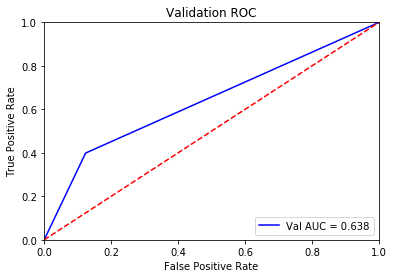

In [89]:
# 画Auc曲线
from sklearn import metrics
import pylab as plt
fpr, tpr, threshold = metrics.roc_curve(test_labels, pred)
roc_auc = metrics.auc(fpr, tpr)
# plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

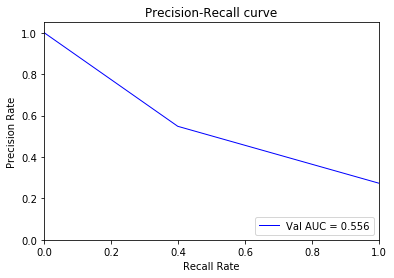

0.5555980512853317


In [90]:
# 画Pr曲线

from sklearn.metrics import precision_recall_curve
import pylab as plt
precision, recall, _ = precision_recall_curve(test_labels, pred)
auc = metrics.auc(recall, precision)
plt.plot(recall,precision,'b',lw=1,label = 'Val AUC = %0.3f' % auc)
plt.legend(loc = 'lower right')
plt.title('Precision-Recall curve')

plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print(auc)

In [91]:
with open("F:/研究生涯/学习/pmi/pmi数据集/pca/99/随机森林pre.txt",'ab') as f:
    np.savetxt(f, pred, delimiter=" ")
with open("F:/研究生涯/学习/pmi/pmi数据集/pca/99/随机森林label.txt",'ab') as f:
    np.savetxt(f, test_labels, delimiter=" ")